In [1]:
#pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url=f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

response = requests.get(query_url + "New York City").json()
response



http://api.openweathermap.org/data/2.5/weather?appid=999fb85742e96c699338def4a2ba44db&units=metric&q=


{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 6.61,
  'feels_like': 0.88,
  'temp_min': 6,
  'temp_max': 7.22,
  'pressure': 1007,
  'humidity': 36},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 350},
 'clouds': {'all': 20},
 'dt': 1614640669,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1614598189,
  'sunset': 1614638829},
 'timezone': -18000,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [5]:
data = []
counter = 0

#For loop
for city in cities:
    counter=counter+1
    
    try:
        response = requests.get(query_url + city ).json()
        temp_max= response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        windspeed=response["wind"]["speed"]
        cloudy=response["clouds"]["all"]
        country=response["sys"]["country"]
        date=response["dt"]
        lat=response["coord"]["lat"]
        lon=response["coord"]["lon"]
        data.append([date,city, country, lat, lon, temp_max, humidity,windspeed, cloudy])
        print(f"{counter} {city}")
        time.sleep(.2)
    except:
        print("City not found.")      

  
print("------------------------------\nData Retrieval Complete\n------------------------------")


1 port alfred
2 punta arenas
3 avarua
City not found.
5 kholm
6 walvis bay
7 hualmay
8 platanos
9 hobart
10 qaanaaq
11 bethel
12 saskylakh
13 clyde river
City not found.
City not found.
16 kapaa
17 tromso
18 albany
19 rikitea
20 jamestown
21 mataura
22 chakulia
23 upernavik
24 mezen
25 flinders
26 shimoda
27 nanortalik
28 busselton
29 waverly
30 nikolskoye
City not found.
City not found.
33 aykhal
34 tokur
35 mongu
36 vila franca do campo
37 bugiri
38 vestmannaeyjar
39 esperance
40 bougouni
41 punta de piedra
42 vaini
43 venado tuerto
44 suntar
45 nabire
46 atuona
47 kandi
48 barrow
49 lorengau
50 imbituba
51 kaitangata
52 rocha
53 lebu
54 panguna
55 kavieng
56 bluff
57 saldanha
58 awbari
59 yacuiba
City not found.
61 kedrovyy
62 hermanus
63 cabo san lucas
64 diego de almagro
65 tiksi
City not found.
67 kawalu
68 caravelas
69 hilo
70 sechura
71 khatanga
72 new norfolk
73 monte alegre de minas
City not found.
75 beloha
City not found.
77 santa maria
78 provideniya
79 east london
80 pont

617 storebo
618 pecos
619 miraflores
620 vieste
621 batagay-alyta
622 mazamari
623 quelimane
624 jibuti
625 yanam
626 liverpool
627 karasburg
628 hovd
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame(data,columns=["date","city", "country", "lat", "lon", "temp_max", "humidity","windspeed", "cloudy"])
city_df

,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614640923,port alfred,ZA,-33.5906,26.8910,21.69,83,5.63,76
1,1614640923,punta arenas,CL,-53.1500,-70.9167,12.78,43,8.23,0
2,1614640924,avarua,CK,-21.2078,-159.7750,29.00,74,3.60,20
3,1614640924,kholm,RU,59.2667,32.8500,0.69,93,4.50,92
4,1614640641,walvis bay,NA,-22.9575,14.5053,20.00,77,1.54,1
...,...,...,...,...,...,...,...,...,...
575,1614641130,jibuti,DJ,11.5000,42.5000,26.00,78,2.06,40
576,1614641130,yanam,IN,16.7333,82.2167,20.04,95,0.93,0
577,1614641131,liverpool,GB,53.4106,-2.9779,5.00,87,4.63,90
578,1614640877,karasburg,NA,-28.0167,18.7500,24.73,45,0.87,68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
highhumidity = city_df[(city_df["humidity"]>100)].index
highhumidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleancity_df=city_df.drop(highhumidity, inplace=False)
cleancity_df


,date,city,country,lat,lon,temp_max,humidity,windspeed,cloudy
0,1614640923,port alfred,ZA,-33.5906,26.8910,21.69,83,5.63,76
1,1614640923,punta arenas,CL,-53.1500,-70.9167,12.78,43,8.23,0
2,1614640924,avarua,CK,-21.2078,-159.7750,29.00,74,3.60,20
3,1614640924,kholm,RU,59.2667,32.8500,0.69,93,4.50,92
4,1614640641,walvis bay,NA,-22.9575,14.5053,20.00,77,1.54,1
...,...,...,...,...,...,...,...,...,...
575,1614641130,jibuti,DJ,11.5000,42.5000,26.00,78,2.06,40
576,1614641130,yanam,IN,16.7333,82.2167,20.04,95,0.93,0
577,1614641131,liverpool,GB,53.4106,-2.9779,5.00,87,4.63,90
578,1614640877,karasburg,NA,-28.0167,18.7500,24.73,45,0.87,68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

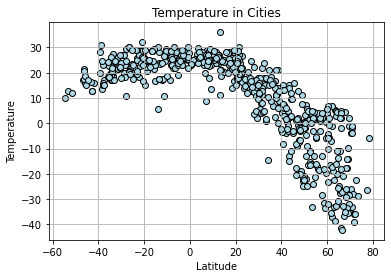

In [30]:
plt.scatter(cleancity_df["lat"],cleancity_df["temp_max"], marker="o", color="lightblue",edgecolor="black")
plt.title("Temperature in Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#printpng
plt.savefig("Temp_in_cities.png")

## Latitude vs. Humidity Plot

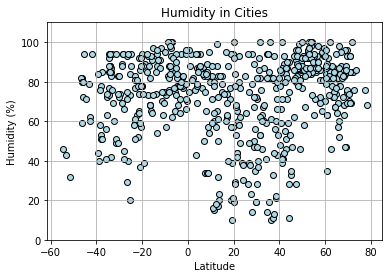

In [31]:
plt.scatter(cleancity_df["lat"],cleancity_df["humidity"], marker="o", color="lightblue",edgecolor="black")
plt.title("Humidity in Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(min(cleancity_df["humidity"])-10,max(cleancity_df["humidity"])+10)
plt.grid(True)



#printpng

plt.savefig("Humid_in_cities.png")



## Latitude vs. Cloudiness Plot

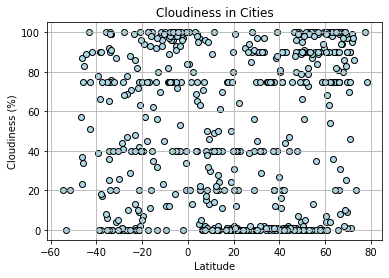

In [32]:
plt.scatter(cleancity_df["lat"],cleancity_df["cloudy"], marker="o", color="lightblue",edgecolor="black")
plt.title("Cloudiness in Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



#printpng

plt.savefig("Cloudy_in_cities.png")


## Latitude vs. Wind Speed Plot

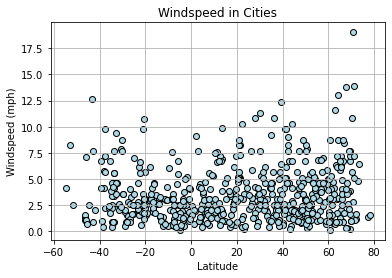

In [33]:
plt.scatter(cleancity_df["lat"],cleancity_df["windspeed"], marker="o", color="lightblue",edgecolor="black")
plt.title("Windspeed in Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


#printpng

plt.savefig("Windy_in_cities.png")


Observation of Scatter Plots



## Linear Regression

In [13]:
northernhem=cleancity_df.loc[cleancity_df["lat"]>=0]
southernhem=cleancity_df.loc[cleancity_df["lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7126691662077839


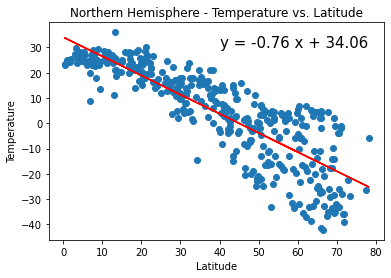

In [14]:
x_values = northernhem["lat"]
y_values = northernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15)
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.23465743868211036


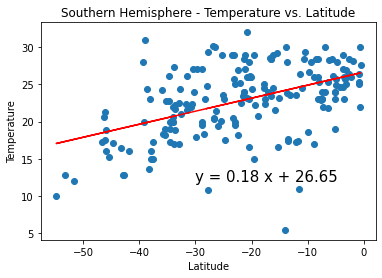

In [15]:
x_values = southernhem["lat"]
y_values = southernhem["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15)
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06453412960836077


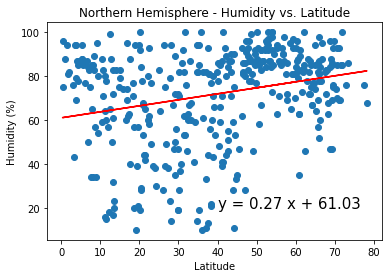

In [16]:
x_values = northernhem["lat"]
y_values = northernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15)
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Observation of Temperature


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08542638284969127


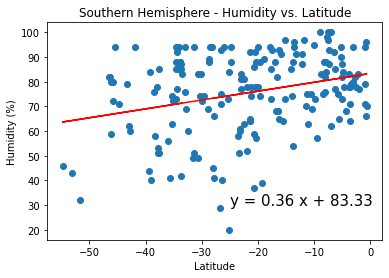

The r-squared is: 0.08542638284969127


In [17]:
x_values = southernhem["lat"]
y_values = southernhem["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Humidity



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10261543176103947


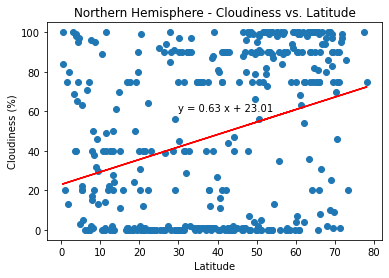

In [36]:
x_values = northernhem["lat"]
y_values = northernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=10)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07159509203084145


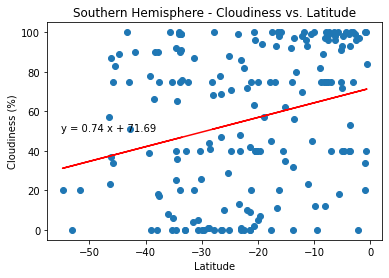

In [19]:
x_values = southernhem["lat"]
y_values = southernhem["cloudy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=10)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.016231716937134186


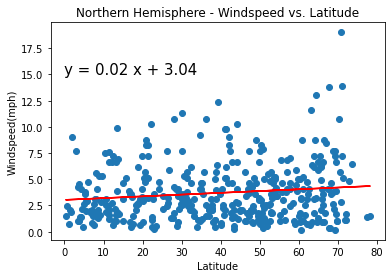

In [20]:
x_values = northernhem["lat"]
y_values = northernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15)
plt.title("Northern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05582118995378416


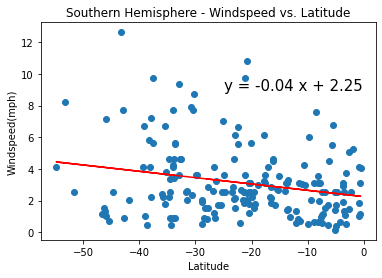

In [21]:
x_values = southernhem["lat"]
y_values = southernhem["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15)
plt.title("Southern Hemisphere - Windspeed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observation of Windspeed

